<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment5(Q2)_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5

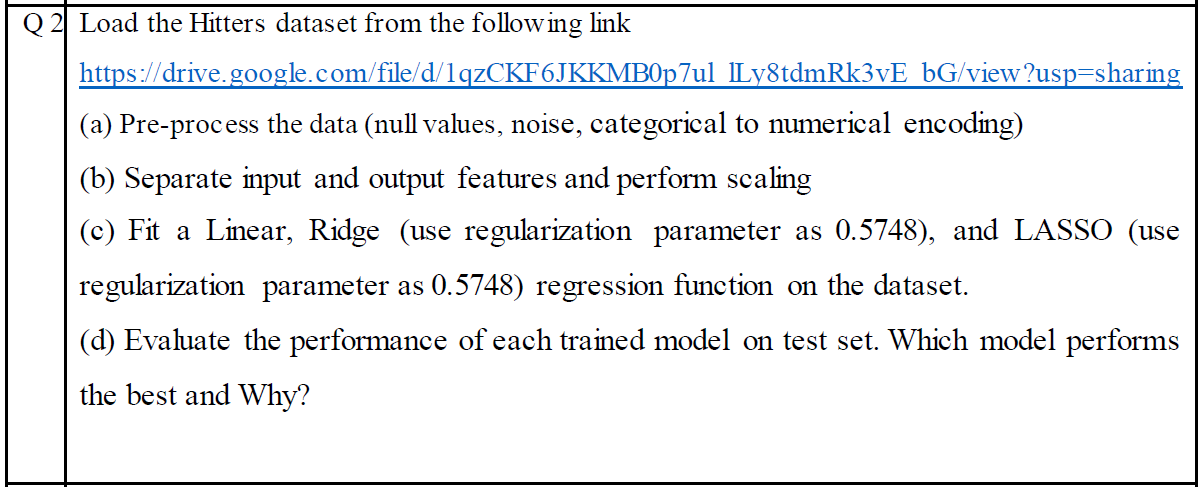

---

Part a

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Hitters.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [22]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


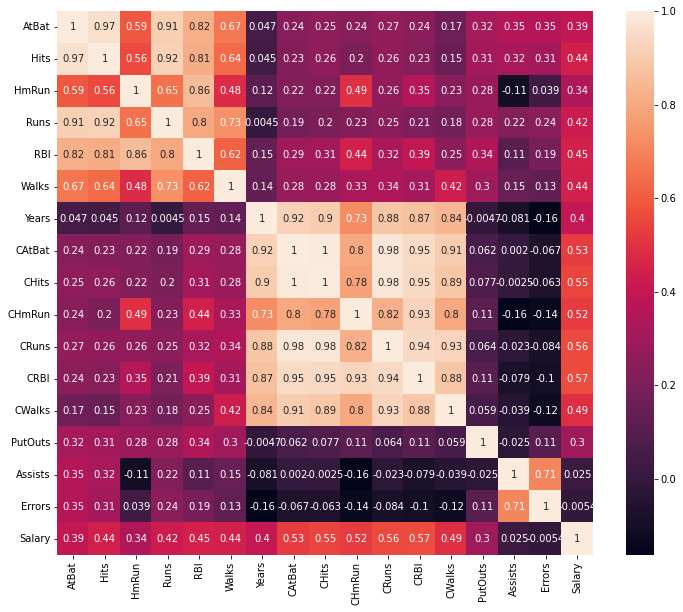

In [23]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

False    322
Name: Salary, dtype: int64
['A' 'N']
['E' 'W']


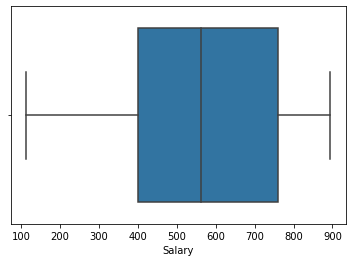

In [24]:
df['Year_lab'] = pd.cut(x=df['Years'], bins=[0, 3, 6, 10, 15, 19, 24])
df['Salary'] = df.groupby(['League', 'Division', 'Year_lab'])['Salary'].transform(lambda x: x.mean())

print(df['Salary'].isna().value_counts())
print(df['League'].unique())
print(df['Division'].unique())

import seaborn as sns
sns.boxplot(x=df['Salary'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['League'] = le.fit_transform(df['League'])
df['Division'] = le.fit_transform(df['Division'])
df['NewLeague'] = le.fit_transform(df['NewLeague'])
df['Year_lab'] = le.fit_transform(df['Year_lab'])

In [25]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Year_lab
0,293,66,1,30,29,14,1,293,66,1,...,29,14,0,0,446,33,20,112.500000,0,0
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,1,1,632,43,10,721.894000,1,3
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,0,1,880,82,14,153.613636,0,0
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,1,0,200,11,3,894.322667,1,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,1,0,805,40,4,248.520813,1,0


Part b

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop("Salary", axis=1)
y=df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

Part c

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(x_train,y_train)
ypred = regressor.predict(x_test)
print(r2_score(y_test,ypred))

0.7665240096095585


In [28]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=0.5748)
regressor.fit(x_train,y_train)
ypred = regressor.predict(x_test)
print(r2_score(y_test,ypred))

0.7693993947780914


In [29]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.5748)
regressor.fit(x_train,y_train)
ypred = regressor.predict(x_test)
print(r2_score(y_test,ypred))

0.7703959136556001


Part d

In [ ]:
# Lasso model is performing best as there are many columns highly correlated to each other and Lasso is able to appropriately set weights for those columns.